In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import surprise
plt.style.use('seaborn-v0_8') 
import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [3]:
from train_valid_test_loader import load_train_valid_test_datasets
DATA_PATH = 'data_movie_lens_100k/' 
assert os.path.exists(os.path.join(DATA_PATH, 'select_movies.csv'))
def print_error(model,test_tuple):
    print("RMSE on the validation set: ", np.round(model.trace_rmse_valid[-1],3))
    print("MAE on the validation set: ", np.round(model.trace_mae_valid[-1],3))
    test_perf_dict = model.evaluate_perf_metrics(*test_tuple)
    
    print("RMSE on the test set: ", np.round(test_perf_dict['rmse'],3))
    print("MAE on the test set: ", np.round(test_perf_dict['mae'],3))

In [4]:
train_tuple, test_tuple, valid_tuple, n_users, n_items = load_train_valid_test_datasets(data_path=DATA_PATH)
n_train = len(train_tuple[0])
n_valid = len(valid_tuple[0])
n_test = len(test_tuple[0])

print("n_train", f"{n_train}")
print("n_valid", f"{n_valid}")
print("n_test", f"{n_test}")

n_train 70000
n_valid 10000
n_test 9992


In [5]:
n_train_examples = len(train_tuple[0])
N = n_train_examples

# Unpack the tuple into its three contained arrays
userids_tr_N = train_tuple[0]
itemids_tr_N = train_tuple[1]
ratings_tr_N = train_tuple[2]

In [5]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

# Step 3(i)
K_list = [2,10,50]
model_list = []
def build_model(K):
    model = CollabFilterOneVectorPerItem(
        n_epochs=6, batch_size=1000, step_size=0.5, n_factors=K)
    model.init_parameter_dict(n_users, n_items, train_tuple)
    model.fit(train_tuple, valid_tuple)
    model_list.append(model)
    return model
for i in K_list:
    build_model(i)


epoch       0.000 | loss_total     1.56000 | tr RMSE     1.24455 | va RMSE     1.23548 | grad_wrt_mu     0.95200 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     1.22449 | tr RMSE     1.12609 | va RMSE     1.12648 | grad_wrt_mu     0.14235 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     1.26688 | tr RMSE     1.12422 | va RMSE     1.12617 | grad_wrt_mu     0.14276 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     1.29049 | tr RMSE     1.12691 | va RMSE     1.13047 | grad_wrt_mu     0.18513 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     1.23861 | tr RMSE     1.11833 | va RMSE  

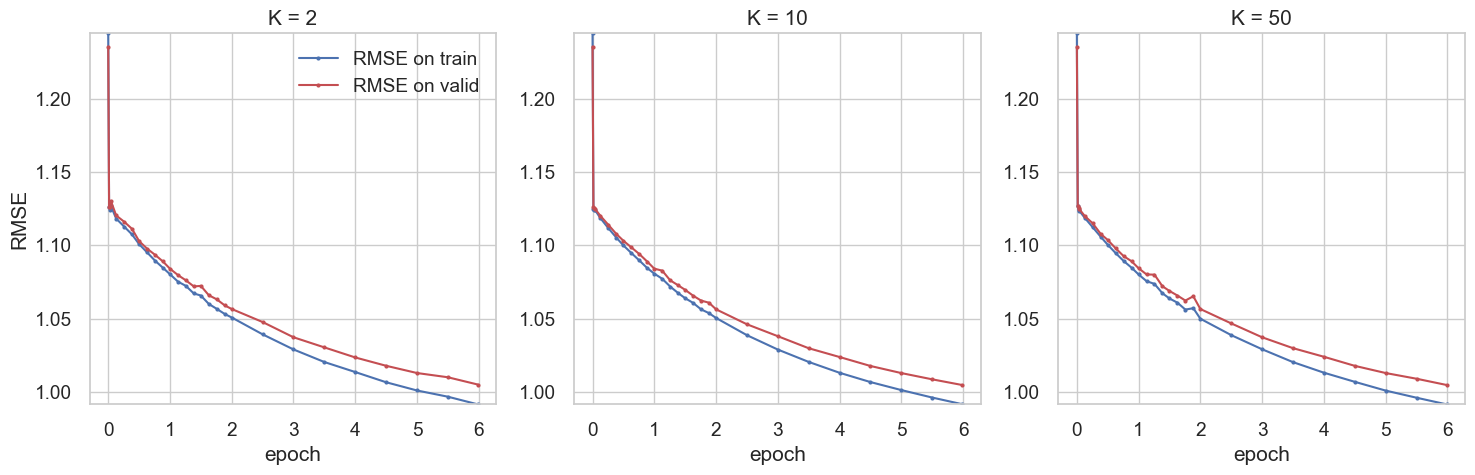

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(model_list[0].trace_epoch, model_list[0].trace_rmse_train, 'b.-', label='RMSE on train')
axes[0].plot(model_list[0].trace_epoch, model_list[0].trace_rmse_valid, 'r.-', label='RMSE on valid')
axes[0].set_title('K = 2')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('RMSE') 
axes[0].legend(loc='upper right')

axes[1].plot(model_list[1].trace_epoch, model_list[1].trace_rmse_train, 'b.-', label='RMSE on train')
axes[1].plot(model_list[1].trace_epoch, model_list[1].trace_rmse_valid, 'r.-', label='RMSE on valid')
axes[1].set_title('K = 10')
axes[1].set_xlabel('epoch')

axes[2].plot(model_list[2].trace_epoch, model_list[2].trace_rmse_train, 'b.-', label='RMSE on train')
axes[2].plot(model_list[2].trace_epoch, model_list[2].trace_rmse_valid, 'r.-', label='RMSE on valid')
axes[2].set_title('K = 50')
axes[2].set_xlabel('epoch')


ymin = min(min(model_list[0].trace_rmse_valid),min(model_list[1].trace_rmse_valid), min(model_list[2].trace_rmse_valid),min(model_list[0].trace_rmse_train),min(model_list[1].trace_rmse_train), min(model_list[2].trace_rmse_train))
ymax = max(max(model_list[0].trace_rmse_valid),max(model_list[1].trace_rmse_valid), max(model_list[2].trace_rmse_valid),max(model_list[0].trace_rmse_train),max(model_list[1].trace_rmse_train), max(model_list[2].trace_rmse_train))

for ax in axes:
    ax.set_ylim(ymin, ymax)
plt.tight_layout()
plt.show()

In [24]:
#Step 3(ii)
model = CollabFilterOneVectorPerItem(
        n_epochs=300, batch_size=1000, step_size=0.5, n_factors=50, alpha=300)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)


epoch       0.000 | loss_total     1.54033 | tr RMSE     1.24455 | va RMSE     1.23548 | grad_wrt_mu     0.93400 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00048 | grad_wrt_V     0.00048
epoch       0.014 | loss_total     1.24700 | tr RMSE     1.12668 | va RMSE     1.12691 | grad_wrt_mu     0.09005 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00033 | grad_wrt_V     0.00033
epoch       0.029 | loss_total     1.22538 | tr RMSE     1.12419 | va RMSE     1.12543 | grad_wrt_mu     0.00990 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00023 | grad_wrt_V     0.00023
epoch       0.043 | loss_total     1.30190 | tr RMSE     1.12348 | va RMSE     1.12466 | grad_wrt_mu     0.16262 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00016 | grad_wrt_V     0.00016
epoch       0.129 | loss_total     1.13356 | tr RMSE     1.11879 | va RMSE  

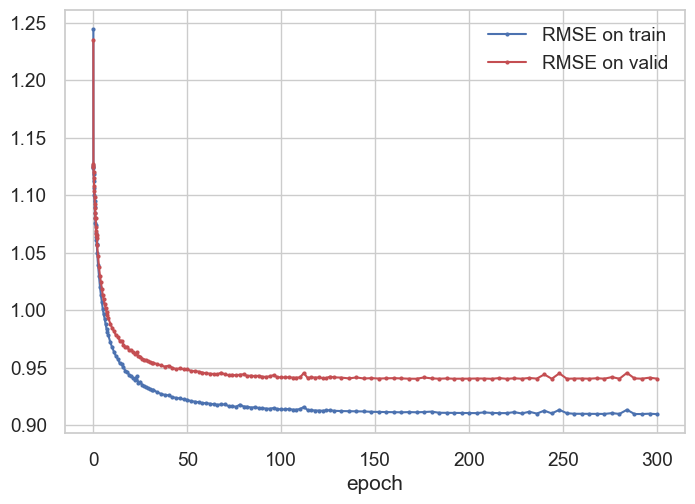

RMSE on the validation set:  0.94
MAE on the validation set:  0.74
RMSE on the test set:  0.948
MAE on the test set:  0.748


In [25]:
plt.plot(model.trace_epoch, model.trace_rmse_train, 'b.-', label='RMSE on train')
plt.plot(model.trace_epoch, model.trace_rmse_valid, 'r.-', label='RMSE on valid')
plt.xlabel('epoch');
plt.legend(loc='upper right');
plt.show()
print_error(model,test_tuple)

Problem 2

In [6]:
data_dir = 'data_movie_lens_100k/' 
user_info = pd.read_csv(os.path.join(data_dir, 'user_info.csv'))
item_info = pd.read_csv(os.path.join(data_dir, 'movie_info.csv'))
ratings = pd.read_csv(os.path.join(data_dir, 'ratings_all_development_set.csv'))

In [7]:
print(user_info.shape)
print(item_info.shape)
print(ratings.shape)
print(item_info.columns)
print(user_info.columns)

(943, 4)
(1681, 4)
(89992, 3)
Index(['item_id', 'title', 'release_year', 'orig_item_id'], dtype='object')
Index(['user_id', 'age', 'is_male', 'orig_user_id'], dtype='object')


In [8]:
list_test = pd.read_csv(os.path.join(data_dir, 'ratings_masked_leaderboard_set.csv'))
list_train = pd.read_csv(os.path.join(data_dir, 'ratings_all_development_set.csv'))

In [9]:
list_test = pd.read_csv(os.path.join(data_dir, 'ratings_masked_leaderboard_set.csv'))
list_train = pd.read_csv(os.path.join(data_dir, 'ratings_all_development_set.csv'))
train_users = set(list_train['user_id'])
train_items = set(list_train['item_id'])
test_users = set(list_test['user_id'])
test_items = set(list_test['item_id'])
missing_users = test_users - train_users
missing_items = test_items - train_items

print(f"none_seen_user: {len(missing_users)}")
print(f"none_seen_movie: {len(missing_items)}")

none_seen_user: 0
none_seen_movie: 19


In [10]:
age_mean = user_info['age'].mean()
age_std = user_info['age'].std()
user_info['age_scaled'] = (user_info['age'] - age_mean) / age_std
release_year_mean = item_info['release_year'].mean()
release_year_std = item_info['release_year'].std()
item_info['release_year_scaled'] = (item_info['release_year'] - release_year_mean) / release_year_std
merged = ratings.merge(user_info[['user_id', 'age_scaled', 'is_male']], on='user_id')
merged = merged.merge(item_info[['item_id', 'release_year_scaled']], on='item_id')

In [50]:
merged.columns

Index(['user_id', 'item_id', 'rating', 'age_scaled', 'is_male',
       'release_year_scaled'],
      dtype='object')

In [ ]:
# run for using SVD
from surprise import Dataset, Reader, SVDpp
from surprise.model_selection import GridSearchCV
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'item_id', 'rating']], reader)

param_grid = {
    'n_factors': [50, 100],   
    'lr_all': [0.005, 0.01],  
    'reg_all': [0.02, 0.1]   
}

gs = GridSearchCV(
    SVDpp(n_epochs=300,verbose=True),
    param_grid,
    measures=['mae'], 
    cv=5,
    return_train_measures=True,
)

gs.fit(data)

In [ ]:
# Run for using KNN
from surprise import Dataset, Reader, KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore
from surprise.model_selection import GridSearchCV
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'item_id', 'rating']], reader)
param_grid = {
    'k': [10, 20, 30, 40,50,60],          
    'sim_options': {
        'name': ['pearson_baseline'],
        'user_based': [True, False],
        'min_support':[1],
        'shrinkage':[0,30,60,100,150,500] 
    },
    'bsl_options': {
        'method': ['als','sgd'],    
        'n_epochs': [200],   
        'reg_i': [5, 10,15],       
        'reg_u': [5, 10,15]   
    }
}
gs = GridSearchCV(
    KNNWithMeans,
    param_grid,
    measures=['mae'],
    cv=5,
    return_train_measures=True,
)

gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [35]:
import numpy as np
from surprise import AlgoBase
from surprise import Prediction
from surprise import accuracy
class SVDWithFeatures(AlgoBase):
    def __init__(self, n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02, user_info=None, item_info=None, verbose=True):
        """
        Initialize the SVDWithFeatures algorithm.
        
        Parameters:
        - n_factors: Number of latent factors.
        - n_epochs: Number of SGD iterations.
        - lr_all: Learning rate for all parameters.
        - reg_all: Regularization strength for all parameters.
        - user_info: DataFrame with user features ('user_id', 'age_scaled', 'is_male').
        - item_info: DataFrame with item features ('item_id', 'release_year_scaled').
        """
        AlgoBase.__init__(self)
        self.n_factors = n_factors
        self.n_epochs = n_epochs
        self.lr = lr_all
        self.reg = reg_all
        self.user_info = user_info
        self.item_info = item_info
        self.verbose = verbose
        # Track MAE for training and validation
        self.train_mae = []
        self.val_mae = []

    def fit(self, trainset, val_set=None):
        """Train the model on the provided trainset."""
        AlgoBase.fit(self, trainset)
        self.val_set = val_set
        # Create feature dictionaries with raw IDs as keys
        user_features = {row['user_id']: (row['age_scaled'], row['is_male']) 
                         for _, row in self.user_info.iterrows()}
        item_features = {row['item_id']: row['release_year_scaled'] 
                         for _, row in self.item_info.iterrows()}

        # Map features to internal IDs
        self.age_scaled_users = [user_features[trainset.to_raw_uid(u)][0] 
                                 for u in range(trainset.n_users)]
        self.is_male_users = [user_features[trainset.to_raw_uid(u)][1] 
                              for u in range(trainset.n_users)]
        self.release_year_scaled_items = [item_features[trainset.to_raw_iid(i)] 
                                          for i in range(trainset.n_items)]

        # Initialize model parameters
        self.global_mean = trainset.global_mean
        self.bu = np.zeros(trainset.n_users)  # User biases
        self.bi = np.zeros(trainset.n_items)  # Item biases
        self.pu = np.random.normal(0, 0.1, (trainset.n_users, self.n_factors))  # User factors
        self.qi = np.random.normal(0, 0.1, (trainset.n_items, self.n_factors))  # Item factors
        self.w_age = 0.0  # Weight for age_scaled
        self.w_gender = 0.0  # Weight for is_male
        self.w_year = 0.0  # Weight for release_year_scaled

        # SGD training loop
        for epoch in range(self.n_epochs):
            for u, i, r in trainset.all_ratings():
                # Get features for current user and item
                age = self.age_scaled_users[u]
                gender = self.is_male_users[u]
                year = self.release_year_scaled_items[i]

                # Compute prediction
                pred = (self.global_mean + self.bu[u] + self.bi[i] + 
                        np.dot(self.pu[u], self.qi[i]) + 
                        self.w_age * age + self.w_gender * gender + self.w_year * year)

                # Compute error and its sign for MAE
                err = r - pred
                sign_err = np.sign(err)

                # Update parameters using MAE gradient
                self.bu[u] += self.lr * (sign_err - self.reg * self.bu[u])
                self.bi[i] += self.lr * (sign_err - self.reg * self.bi[i])

                # Use temporary copy to avoid updating pu[u] before qi[i]
                pu_temp = self.pu[u].copy()
                self.pu[u] += self.lr * (sign_err * self.qi[i] - self.reg * self.pu[u])
                self.qi[i] += self.lr * (sign_err * pu_temp - self.reg * self.qi[i])

                # Update feature weights
                self.w_age += self.lr * (sign_err * age - self.reg * self.w_age)
                self.w_gender += self.lr * (sign_err * gender - self.reg * self.w_gender)
                self.w_year += self.lr * (sign_err * year - self.reg * self.w_year)
            train_pred = self.test(trainset.build_testset())
            train_mae = accuracy.mae(train_pred, verbose=False)
            self.train_mae.append(train_mae)

            # Compute validation MAE (if validation set provided)
            if self.val_set is not None:
                val_pred = self.test(self.val_set)
                val_mae = accuracy.mae(val_pred, verbose=False)
                self.val_mae.append(val_mae)

            if self.verbose:
                print(f"Epoch {epoch + 1}/{self.n_epochs}")
                print(f"  Training MAE: {train_mae:.4f}")
                if self.val_set is not None:
                    print(f"  Validation MAE: {val_mae:.4f}")
        return self

    

    def predict(self, uid, iid, r_ui=None, clip=True, verbose=False):
        """Make a prediction for a user-item pair and return a Prediction object."""
        # Convert raw IDs to internal IDs, if they exist
        try:
            iuid = self.trainset.to_inner_uid(uid)
        except ValueError:
            iuid = None
        try:
            iiid = self.trainset.to_inner_iid(iid)
        except ValueError:
            iiid = None

        # Get features using raw IDs
        user_row = self.user_info[self.user_info['user_id'] == uid]
        age = user_row['age_scaled'].values[0] if not user_row.empty else 0
        gender = user_row['is_male'].values[0] if not user_row.empty else 0
        item_row = self.item_info[self.item_info['item_id'] == iid]
        year = item_row['release_year_scaled'].values[0] if not item_row.empty else 0

        # Compute prediction based on known user/item status
        pred = self.global_mean
        if iuid is not None:
            pred += self.bu[iuid]
        if iiid is not None:
            pred += self.bi[iiid]
        if iuid is not None and iiid is not None:
            pred += np.dot(self.pu[iuid], self.qi[iiid])
        pred += self.w_age * age + self.w_gender * gender + self.w_year * year

        # Clip prediction to rating scale (e.g., 1 to 5)
        if clip:
            pred = max(1, min(5, pred))

        # Return a Prediction object
        return Prediction(uid, iid, r_ui, pred, details={'was_impossible': False})
# Existing imports and data loading remain unchanged
import os
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
data_dir = 'data_movie_lens_100k/'
user_info = pd.read_csv(os.path.join(data_dir, 'user_info.csv'))
item_info = pd.read_csv(os.path.join(data_dir, 'movie_info.csv'))
ratings = pd.read_csv(os.path.join(data_dir, 'ratings_all_development_set.csv'))
list_test = pd.read_csv(os.path.join(data_dir, 'ratings_masked_leaderboard_set.csv'))
list_train = pd.read_csv(os.path.join(data_dir, 'ratings_all_development_set.csv'))

# Feature scaling
age_mean = user_info['age'].mean()
age_std = user_info['age'].std()
user_info['age_scaled'] = (user_info['age'] - age_mean) / age_std
release_year_mean = item_info['release_year'].mean()
release_year_std = item_info['release_year'].std()
item_info['release_year_scaled'] = (item_info['release_year'] - release_year_mean) / release_year_std

# Merge features (for reference, not used directly in Dataset)
merged = ratings.merge(user_info[['user_id', 'age_scaled', 'is_male']], on='user_id')
merged = merged.merge(item_info[['item_id', 'release_year_scaled']], on='item_id')

# Prepare Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'item_id', 'rating']], reader)

# Define parameter grid for SVDWithFeatures
param_grid = {
    'n_factors': [50],
    'n_epochs': [200],
    'lr_all': [0.001],
    'reg_all': [0.1]
}
trainset_full = data.build_full_trainset()

# Split into training and validation sets (80-20 split)
trainset, valset = train_test_split(data, test_size=0.2, random_state=42)
algo = SVDWithFeatures(
    n_factors=50,
    n_epochs=200,
    lr_all=0.005,
    reg_all=0.02,
    user_info=user_info,
    item_info=item_info,
    verbose=True
)

# Train and track MAE
algo.fit(trainset, val_set=valset)


Epoch 1/200
  Training MAE: 0.8235
  Validation MAE: 0.8395
Epoch 2/200
  Training MAE: 0.7753
  Validation MAE: 0.7987
Epoch 3/200
  Training MAE: 0.7546
  Validation MAE: 0.7840
Epoch 4/200
  Training MAE: 0.7404
  Validation MAE: 0.7751
Epoch 5/200
  Training MAE: 0.7287
  Validation MAE: 0.7688
Epoch 6/200
  Training MAE: 0.7188
  Validation MAE: 0.7640
Epoch 7/200
  Training MAE: 0.7107
  Validation MAE: 0.7610
Epoch 8/200
  Training MAE: 0.7022
  Validation MAE: 0.7577
Epoch 9/200
  Training MAE: 0.6967
  Validation MAE: 0.7573
Epoch 10/200
  Training MAE: 0.6906
  Validation MAE: 0.7564
Epoch 11/200
  Training MAE: 0.6827
  Validation MAE: 0.7544
Epoch 12/200
  Training MAE: 0.6770
  Validation MAE: 0.7544
Epoch 13/200
  Training MAE: 0.6696
  Validation MAE: 0.7537
Epoch 14/200
  Training MAE: 0.6629
  Validation MAE: 0.7536
Epoch 15/200
  Training MAE: 0.6554
  Validation MAE: 0.7534
Epoch 16/200
  Training MAE: 0.6484
  Validation MAE: 0.7537
Epoch 17/200
  Training MAE: 0.64

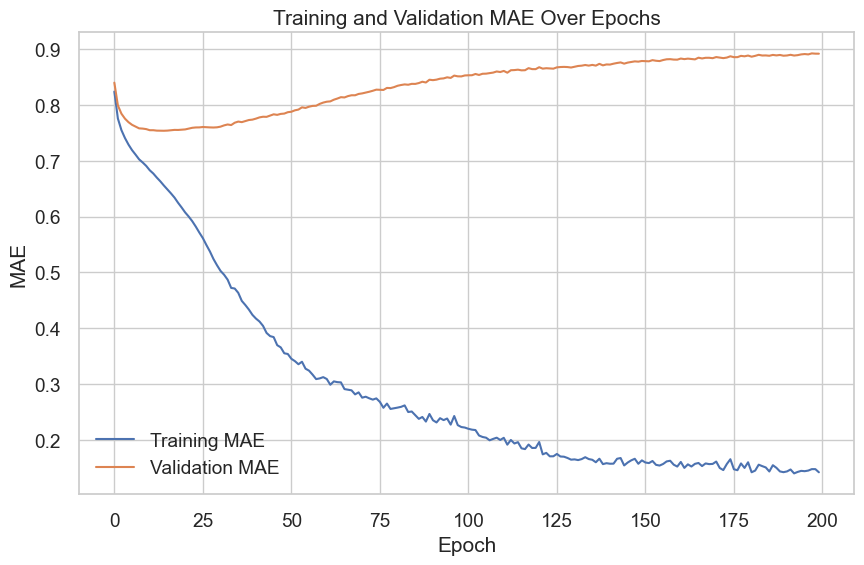

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(algo.train_mae, label='Training MAE')
plt.plot(algo.val_mae, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [27]:

print("Best MAE:", gs.best_score['mae'])
print("Best Parameters:", gs.best_params['mae'])

best_model = gs.best_estimator['mae']
trainset = data.build_full_trainset()
best_model.fit(trainset)

Best MAE: 0.7242951171126595
Best Parameters: {'k': 30, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 1, 'shrinkage': 500}}
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [28]:
def safe_predict(model, user_id, item_id):
    try:
        inner_uid = model.trainset.to_inner_uid(user_id)
        inner_iid = model.trainset.to_inner_iid(item_id)
        return model.predict(user_id, item_id).est
    except ValueError:
        if user_id not in model.trainset._raw2inner_id_users:
            if item_id in model.trainset._raw2inner_id_items:
                inner_iid = model.trainset.to_inner_iid(item_id)
                item_ratings = model.trainset.ir[inner_iid]
                return np.mean([r for (_, r) in item_ratings]) if item_ratings else model.trainset.global_mean
            else:
                return model.trainset.global_mean
        else:
            inner_uid = model.trainset.to_inner_uid(user_id)
            user_ratings = model.trainset.ur[inner_uid]
            return np.mean([r for (_, r) in user_ratings]) if user_ratings else model.trainset.global_mean

leaderboard = pd.read_csv(os.path.join(data_dir, 'ratings_masked_leaderboard_set.csv'))
predictions = []
for _, row in leaderboard.iterrows():
    u = row['user_id']
    i = row['item_id']
    pred = safe_predict(best_model,u, i)
    if isinstance(pred,tuple):
        #predictions.append(pred)
        predictions.append(np.clip(pred[0], 1, 5))
    else:
        predictions.append(np.clip(pred, 1, 5))


# Save to file with exactly 10000 predictions
np.savetxt('predicted_ratings_leaderboard.txt', predictions, fmt='%.5f')

In [34]:
results_df = pd.DataFrame(gs.cv_results)
results_df.columns
results_df["mean_test_mae"]

0     0.770645
1     0.747265
2     0.744867
3     0.744288
4     0.743990
        ...   
67    0.727754
68    0.726508
69    0.725891
70    0.725516
71    0.724962
Name: mean_test_mae, Length: 72, dtype: float64

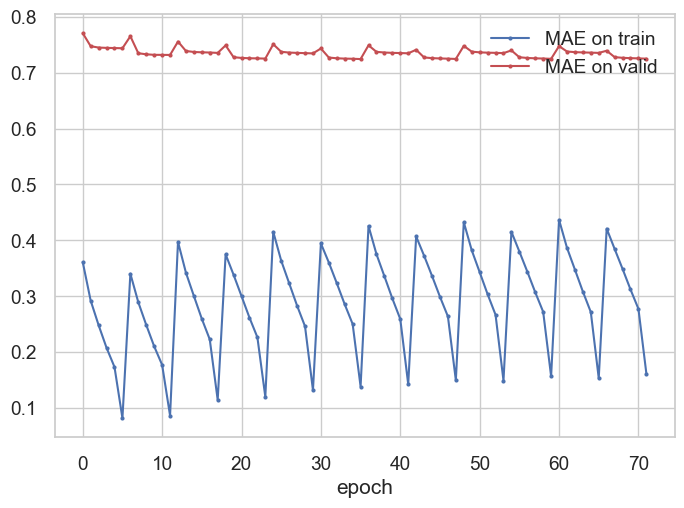

In [33]:
plt.plot(results_df["mean_train_mae"], 'b.-', label='MAE on train')
plt.plot(results_df["mean_test_mae"], 'r.-', label='MAE on valid')
plt.xlabel('epoch');
plt.legend(loc='upper right');
plt.show()